# Statistical Inference & Distributions

Visualizing distributions used in statistical inference.

In [1]:
import numpy as np
from scipy.stats import chi2, t
from matplotlib import pyplot

## Chi-Squared Distribution

If $Z_1, \dots, Z_k$ are independent, standard normal random variables, then:

$$\sum_{i=1}^k Z_i^2\ \sim\ \chi^2(k)$$

The chi-squared ($\chi^2$) distribution has one parameter: a positive integer $k$ that specifies the number of degrees of freedom (the number of random variables being summed, $Z_i$s).

In [2]:
degrees_freedom = 7

In [3]:
samples1 = [np.sum(np.square(np.random.standard_normal(degrees_freedom))) for _ in range(1000000)]

In [4]:
samples2 = []

for _ in range(1000000):
  expected = np.random.uniform(low=70, high=120, size=degrees_freedom)
  observed = expected + np.random.normal(loc=0, scale=8, size=degrees_freedom)
  diff_sq = np.square(observed - expected)
  samples2.append(np.sum(diff_sq / expected))

In [5]:
samples3 = []

expected = np.random.uniform(low=70, high=120, size=degrees_freedom)
for _ in range(1000000):
  observed = expected + np.random.normal(loc=0, scale=15, size=degrees_freedom)
  diff_sq = np.square(observed - expected)
  samples3.append(np.sum(diff_sq / expected))

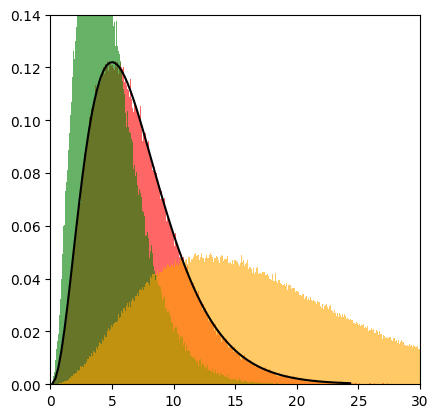

In [6]:
_, ax = pyplot.subplots()
ax.set_box_aspect(1)
pyplot.xlim(0, 30)
pyplot.ylim(0, 0.14)

x = np.linspace(chi2.ppf(0.00001, degrees_freedom), chi2.ppf(0.999, degrees_freedom), 100)
pyplot.plot(x, chi2.pdf(x, degrees_freedom), color='black')
pyplot.hist(samples1, bins=2000, density=True, color='red', alpha=0.6)
pyplot.hist(samples2, bins=2000, density=True, color='green', alpha=0.6)
pyplot.hist(samples3, bins=2000, density=True, color='orange', alpha=0.6)
pyplot.show()

## Chi-Squared Distribution (Example 2)

Errors are set in such a way the distribution of the statistic is actually distributed according to the Chi-squared distribution (PDF function).

In [7]:
n = 8
degrees_freedom = n

In [8]:
def get_random_freqs(n, total):
  equal_part = total / n
  errors = np.random.normal(loc=0, scale=np.sqrt(equal_part), size=n)
  return np.array([equal_part] * n) + errors

def compute_chi2(observed, expected):
  diff = observed - expected
  diff_sq = np.square(diff)
  diff_sq_div = diff_sq / expected
  return np.sum(diff_sq_div)

total = 100
expected = np.array([total / n] * n)

freq_samples = [get_random_freqs(n, total) for _ in range(5_000_000)]

chi2_values = [compute_chi2(freqs, expected) for freqs in freq_samples]

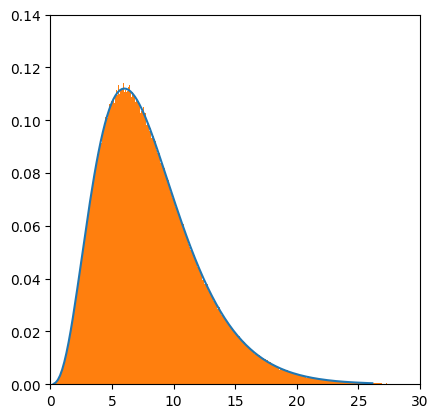

In [9]:
_, ax = pyplot.subplots()
ax.set_box_aspect(1)
pyplot.xlim(0, 30)
pyplot.ylim(0, 0.14)

x = np.linspace(chi2.ppf(0.00001, degrees_freedom), chi2.ppf(0.999, degrees_freedom), 150)
pyplot.plot(x, chi2.pdf(x, degrees_freedom))
pyplot.hist(chi2_values, bins=3000, density=True)
pyplot.show()

## Student's t-Distribution

If $x_1, x_2, \dots, x_n \sim {\mathcal N}(\mu, \sigma^2)\$ (independent and identically distributed samples), then:

$$t = \frac{\bar{x} - \mu}{\sqrt{s^2 / n}} \sim t_{n-1}$$

($t$ statistic is distributed according to a Student's t distribution with $n-1$ degrees of freedom)

Where $\bar{x}$ is the sample mean, and $s^2$ the sample variance.

The t-distribution is similar to the standard normal distribution, but is used when the sample size is small or the population standard deviation is unknown.

In [10]:
n = 20

degrees_freedom = n - 1

In [11]:
def get_sample_compute_t(population, n, mu):
  sample = np.random.choice(population, size=n)
  s = np.std(sample, ddof=1)
  a = sample.mean() - mu
  b = s / np.sqrt(n)
  return a / b

population = np.random.uniform(low=100, high=3000, size=100000)

population_mean = population.mean()

t_values1 = [get_sample_compute_t(population, n, population_mean) for _ in range(5000)]
t_values2 = [get_sample_compute_t(population, n, population_mean - 500) for _ in range(5000)]
t_values3 = [get_sample_compute_t(population, n, population_mean + 500) for _ in range(5000)]

In [12]:
region_low = t.ppf(0.025, degrees_freedom)
region_high = t.ppf(1 - 0.025, degrees_freedom)

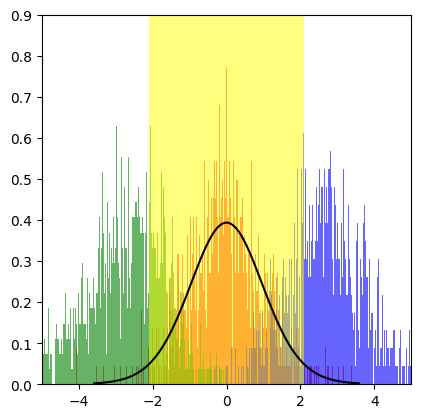

In [13]:
_, ax = pyplot.subplots()
ax.set_box_aspect(1)
pyplot.xlim(-5, 5)
pyplot.ylim(0, 0.9)

x = np.linspace(t.ppf(0.001, degrees_freedom), t.ppf(0.999, degrees_freedom), 100)
pyplot.plot(x, t.pdf(x, degrees_freedom), color='black')
pyplot.hist(t_values1, bins=2000, density=True, color='red', alpha=0.6)
pyplot.hist(t_values2, bins=2000, density=True, color='blue', alpha=0.6)
pyplot.hist(t_values3, bins=2000, density=True, color='green', alpha=0.6)

pyplot.fill_betweenx([0, 1], region_low, region_high, facecolor='yellow', alpha=0.5)

pyplot.show()